## Programming Homework

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [21]:
##!python -m wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [22]:
## to read file
def ReadGenome(filename):
    genome = ""
    with open(filename, "r") as f:
        for line in f:
            if not line[0] == ">":
                genome += line.rstrip()
    return genome

##read file
genome = ReadGenome("lambda_virus.fa")

In [23]:
## reverse complement function
##def function
def ReverseComplement(s):
    complement = {"A": "T", "C": "G", "T": "A","G": "C", "N": "N"}  # array for dictionary
    ##add the N to the dictionary, as it can be found in the reads

    t = ""  # empty
    for base in s:
        t = complement[base] + t
    return t


In [24]:
## naive_rc
def naive_with_rc(p, genome):
    reverse = ReverseComplement(p)
    ocurrences = []

    for i in range(len(genome) - len(p) +1): #loop
        match = True
        for j in range(len(p)): #loop
            if genome[i+j] != p[j]:
                match = False
                break
        if not match:
            match=True
            for j in range(len(p)):
                if genome[i+j] != reverse[j]:
                    match=False
                    break
        if match:
            ocurrences.append(i)
    return ocurrences

In [25]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [26]:
#Question 1
print(len(naive_with_rc('AGGT', genome)))

306


In [27]:
#Question 2
print(len(naive_with_rc('TTAA', genome)))


195


In [28]:
#Question 3
print(min(naive_with_rc('ACTAAGT', genome)))


26028


In [29]:
#Question 4
print(min(naive_with_rc('AGTCGA', genome)))


450


In [30]:
## naive_rc
def naive_2mm(p, genome):
    ocurrences = []

    for i in range(len(genome) - len(p) + 1):  # loop
        count_mismatch = 0
        for j in range(len(p)):  # loop
            if genome[i+j] != p[j]:
                    count_mismatch +=1
        if count_mismatch <=2:
            ocurrences.append(i)
    return ocurrences


In [31]:
#example
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)


[10, 24, 38]


In [32]:
#Question 5
print(len(naive_2mm("TTCAAGCC", genome)))


191


In [33]:
#Question 6
print(min(naive_2mm("AGGAGGTT", genome)))


49


In [34]:
#Question 7
#!python -m wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

In [35]:
#read and parse
def readFastQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() #ignore line
            seq = fh.readline().rstrip()
            fh.readline() #ignore line
            qual = fh.readline().rstrip()
            if len(seq) == 0: #if have reached the end of the file
                break
            sequences.append(seq) #append all the reads
            qualities.append(qual) #append all the qualities
    return sequences, qualities

_, quals = readFastQ("ERR037900_1.first1000.fastq") #open file

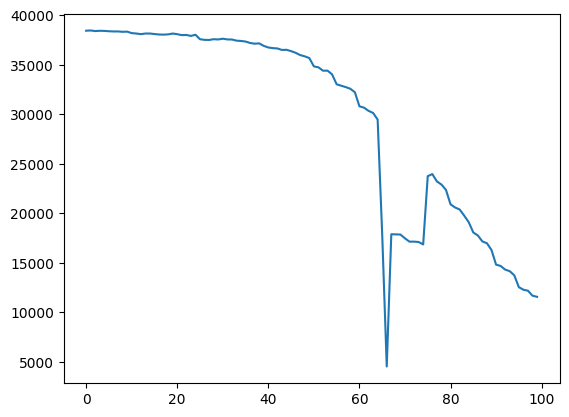

In [39]:
#convert PHRED33 to quality score
import matplotlib.pyplot as plt
def phred33ToQ(qual):
    return ord(qual) - 33


def createHist(qualities):
    hist = [0] * len(qualities[0])
    for qual in qualities:
        for phred in range(len(qual)):
            q = phred33ToQ(qual[phred])
            hist[phred] += q
    return hist


h = createHist(quals)
plt.plot(range(len(h)), h)
plt.show()
